<a href="https://colab.research.google.com/github/Brokerus/DA_Projects/blob/main/Project_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset


---


**Property id** - The unique value of each Property.

**Location id** - The unique value of each location is based on the subcategory of the city.

**Page URL** - The URL of the page where the property was published.

**Property_type** - In this section we have six different types:

*House,
FarmHouse,
Upper Portion,
Lower Portion,
Flat,
Room.*

**Price** - Price is a dependent feature/parameter in this dataset.

**City** - In this dataset the total number of cities is five:

*Lahore,
Karachi,
Faisalabad,
Rawalpindi,
Islamabad.*

**Province** - Province parameter is about the state of the city

**Location** - It is about the different kinds of locations in each city.

The **Latitude** and **Longitude** of the Cities.

#Stage 1. Data acquisition

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

Import the file **House_Price_dataset.csv** and save it in a variable **HP_df**

In [114]:
HP_df = pd.read_csv('/content/drive/MyDrive/Project_House_Price/House_Price_dataset.csv')

Get the first 10 rows of the table

In [115]:
HP_df.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04-05-2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal


General information

In [116]:
HP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

There are **20** columns in the table, **3** of them are **float64** data type, **5** are **int64** data type, and the remaining **12** are object data type. The number of values in two columns is less than in the others, indicating that there is not enough data in those columns.

#Stage 2. Data preprocessing

Checking for duplicates.

In [117]:
HP_df.duplicated().sum()

0

Rename some columns

In [118]:
HP_df.rename(columns={'Area Type':'area_type','Area Size':'area_size','Area Category':'area_category'},inplace = True)

Missing values are removed so that there are no problems in the future

In [119]:
HP_df.dropna(subset = ['agency','agent'],inplace = True)
HP_df = HP_df.reset_index(drop = True)

**Conclusions**

At the preprocessing stage, gaps and problems with column names were found in the data, the presence of duplicates was not established. The column names are now correct and convenient for further work.


#Stage 3. Exploratory data analysis#

In [120]:
HP_df.head(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_type,area_size,area_category
0,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
1,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
2,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
3,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal
4,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,06-03-2019,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla


Find the number of building types in each city

In [121]:
HP_df.groupby('city')['property_type'].value_counts()

city        property_type
Faisalabad  House             4986
            Upper Portion      647
            Lower Portion      364
            Room                70
            Flat                24
            Farm House           5
Islamabad   House            14892
            Flat              5376
            Upper Portion     4144
            Lower Portion     3181
            Farm House         163
            Room               116
            Penthouse           28
Karachi     Flat             19556
            House            19230
            Upper Portion     3738
            Lower Portion     1870
            Penthouse          209
            Farm House          50
            Room                44
Lahore      House            29637
            Flat              1250
            Farm House         235
            Upper Portion       53
            Lower Portion       39
            Room                 6
            Penthouse            3
Rawalpindi  House            

Visualize the results

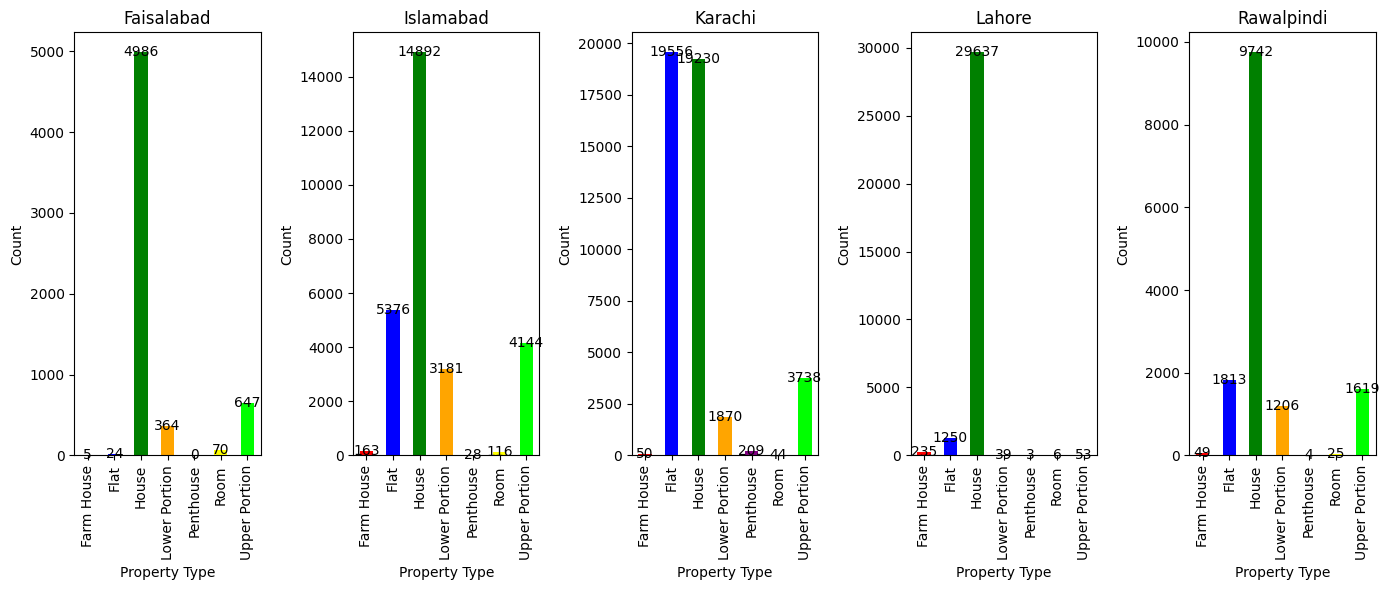

In [122]:
pi_tb = HP_df.pivot_table(index='property_type', columns='city', aggfunc='size', fill_value=0)
# Get the list of cities
cities = list(pi_tb.columns)
colors = ['red', 'blue', 'green', 'orange', 'purple','yellow','lime']

# Create subplots for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(14, 6))

# Iterate over each city and create a bar plot
for i, city in enumerate(cities):
    ax = axes[i] if len(cities) > 1 else axes
    pi_tb[city].plot(kind='bar', ax=ax, color = colors)
    ax.set_title(city)
    ax.set_xlabel('Property Type')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
# Adjust spacing between subplots
plt.tight_layout()

Find the mean price of building types in each city

In [123]:
HP_df.groupby(['property_type','city'])['price'].mean()

property_type  city      
Farm House     Faisalabad    4.380000e+07
               Islamabad     7.823653e+07
               Karachi       3.357736e+07
               Lahore        5.620691e+07
               Rawalpindi    1.923571e+07
Flat           Faisalabad    1.371458e+06
               Islamabad     5.580657e+06
               Karachi       1.014283e+07
               Lahore        9.072059e+06
               Rawalpindi    3.380641e+06
House          Faisalabad    8.909348e+06
               Islamabad     2.458295e+07
               Karachi       3.782240e+07
               Lahore        2.768649e+07
               Rawalpindi    1.218127e+07
Lower Portion  Faisalabad    4.461676e+04
               Islamabad     5.763298e+04
               Karachi       4.459083e+06
               Lahore        3.061334e+06
               Rawalpindi    5.381526e+04
Penthouse      Islamabad     2.625339e+07
               Karachi       1.738476e+07
               Lahore        3.366667e+07
        

Visualize the results

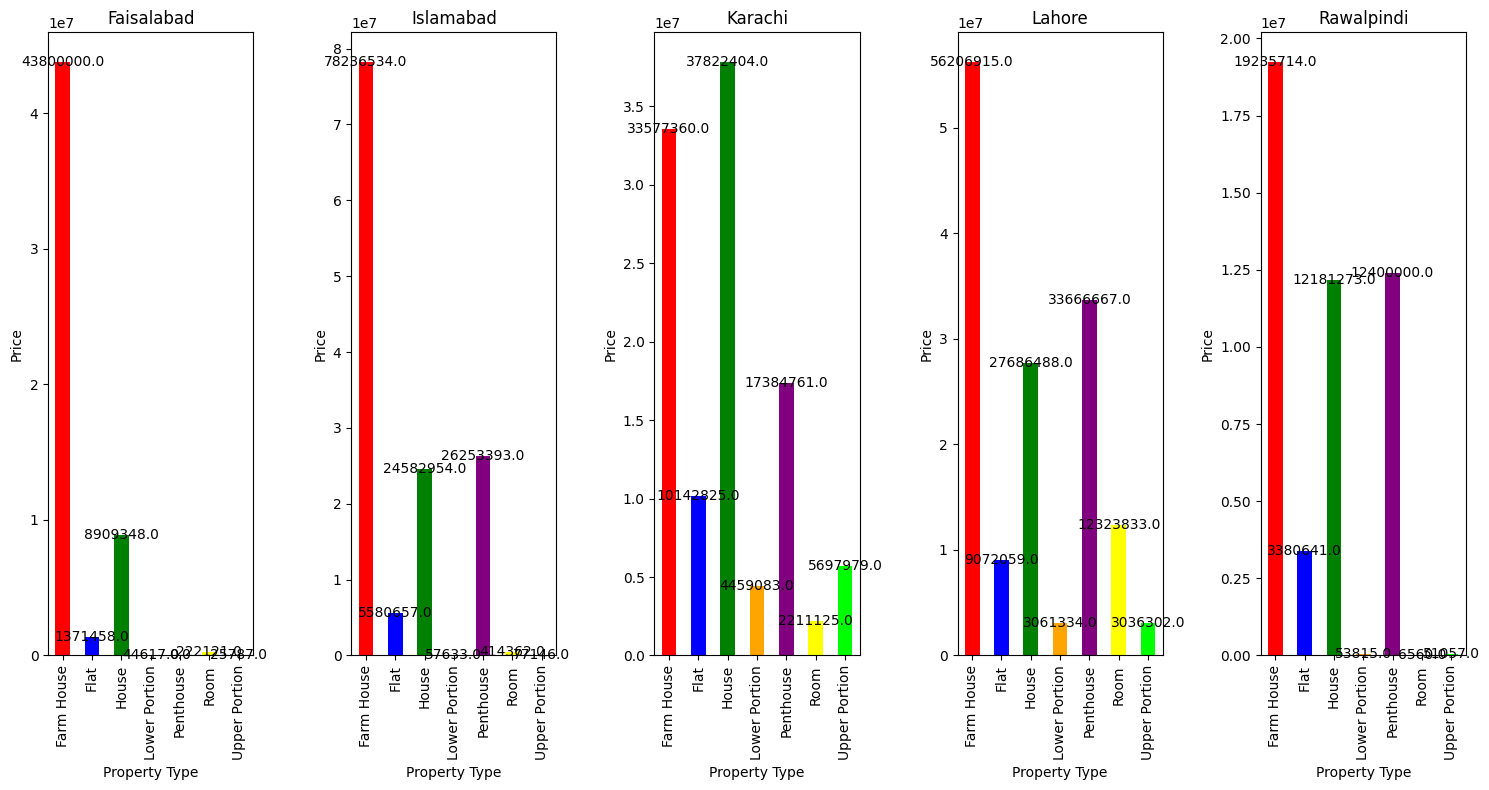

In [124]:
mean_price = HP_df.pivot_table(index = 'property_type', columns = 'city',values = 'price', aggfunc = 'mean', fill_value = 0)
mean_price = mean_price.round(0)
cities = list(mean_price.columns)
colors = ['red', 'blue', 'green', 'orange', 'purple','yellow','lime']

# Create subplots for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(15, 8))

# Iterate over each city and create a bar plot
for i, city in enumerate(cities):
    ax = axes[i] if len(cities) > 1 else axes
    mean_price[city].plot(kind='bar', ax=ax, color = colors)
    ax.set_title(city)
    ax.set_xlabel('Property Type')
    ax.set_ylabel('Price')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
# Adjust spacing between subplots
plt.tight_layout()

Find the average area size for building types in each city

In [125]:
HP_df.groupby(['property_type','city'])['area_size'].mean()

property_type  city      
Farm House     Faisalabad    10.780000
               Islamabad     14.566258
               Karachi        8.462000
               Lahore        11.066383
               Rawalpindi     9.418367
Flat           Faisalabad     2.358333
               Islamabad      5.577400
               Karachi        6.151565
               Lahore         5.981840
               Rawalpindi     4.951407
House          Faisalabad     5.691135
               Islamabad      5.676726
               Karachi        6.281383
               Lahore         5.163046
               Rawalpindi     6.434213
Lower Portion  Faisalabad     6.584341
               Islamabad      7.475762
               Karachi        6.392299
               Lahore         4.641026
               Rawalpindi     6.987645
Penthouse      Islamabad      6.492857
               Karachi        7.633971
               Lahore         7.333333
               Rawalpindi     8.325000
Room           Faisalabad     1.107143

Visualize the results

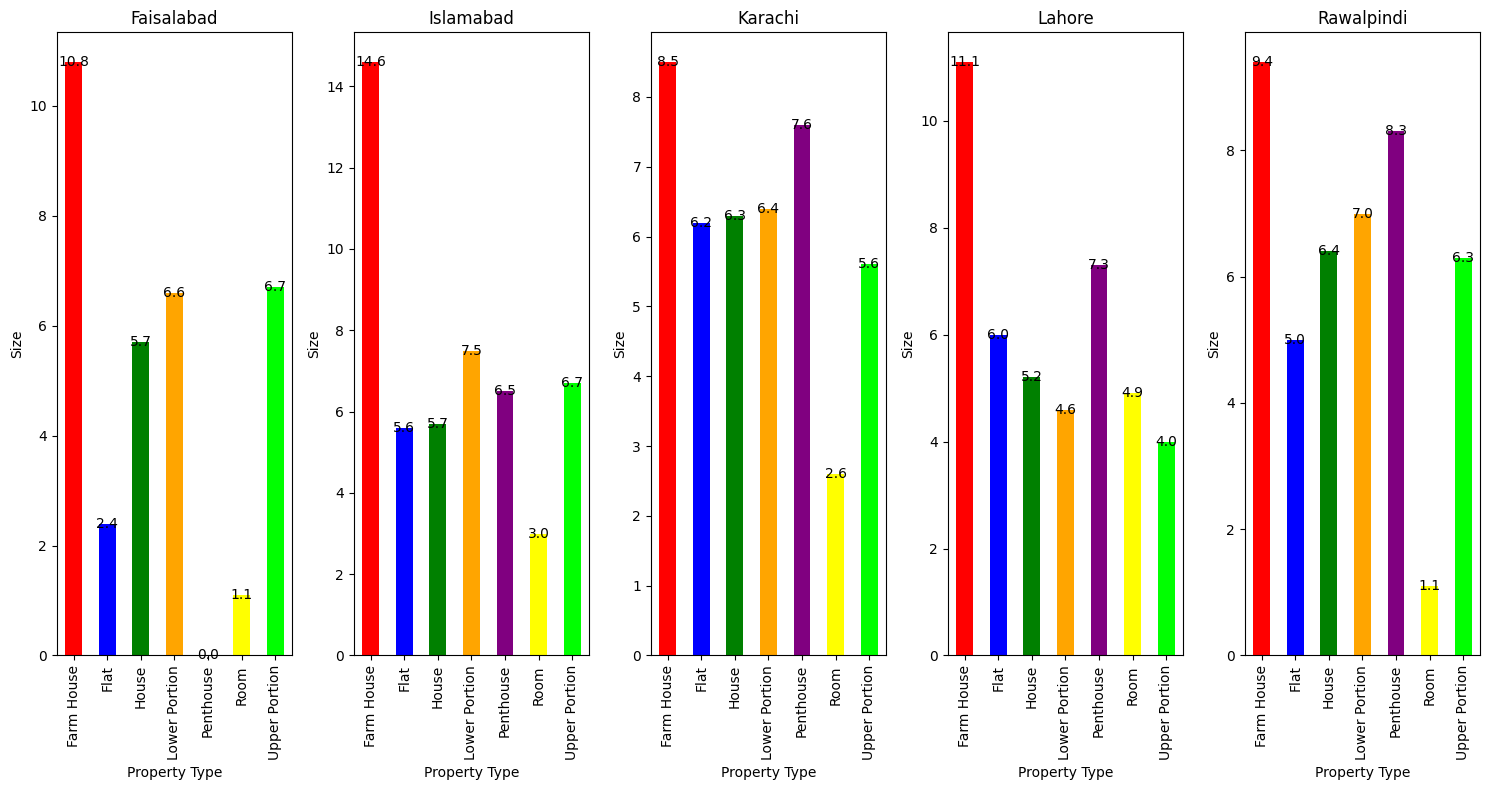

In [126]:
mean_size = HP_df.pivot_table(index = 'property_type', columns = 'city', values = 'area_size', aggfunc = 'mean').round(1)
cities = list(mean_size.columns)
colors = colors = ['red', 'blue', 'green', 'orange', 'purple','yellow','lime']

# Create subplots for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(15, 8))

# Iterate over each city and create a bar plot
for i, city in enumerate(cities):
    ax = axes[i] if len(cities) > 1 else axes
    mean_size[city].plot(kind='bar', ax=ax, color = colors)
    ax.set_title(city)
    ax.set_xlabel('Property Type')
    ax.set_ylabel('Size')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
# Adjust spacing between subplots
plt.tight_layout()

Find the number of ads by month

In [127]:
HP_df.groupby(['property_type','city'])['date_added'].value_counts()

property_type  city        date_added
Farm House     Faisalabad  06-18-2019     2
                           06-19-2019     1
                           06-26-2019     1
                           07-16-2019     1
               Islamabad   05-05-2019    16
                                         ..
Upper Portion  Rawalpindi  12-10-2018     3
                           06-07-2019     2
                           11-10-2018     2
                           09-20-2018     1
                           10-20-2018     1
Name: date_added, Length: 1203, dtype: int64

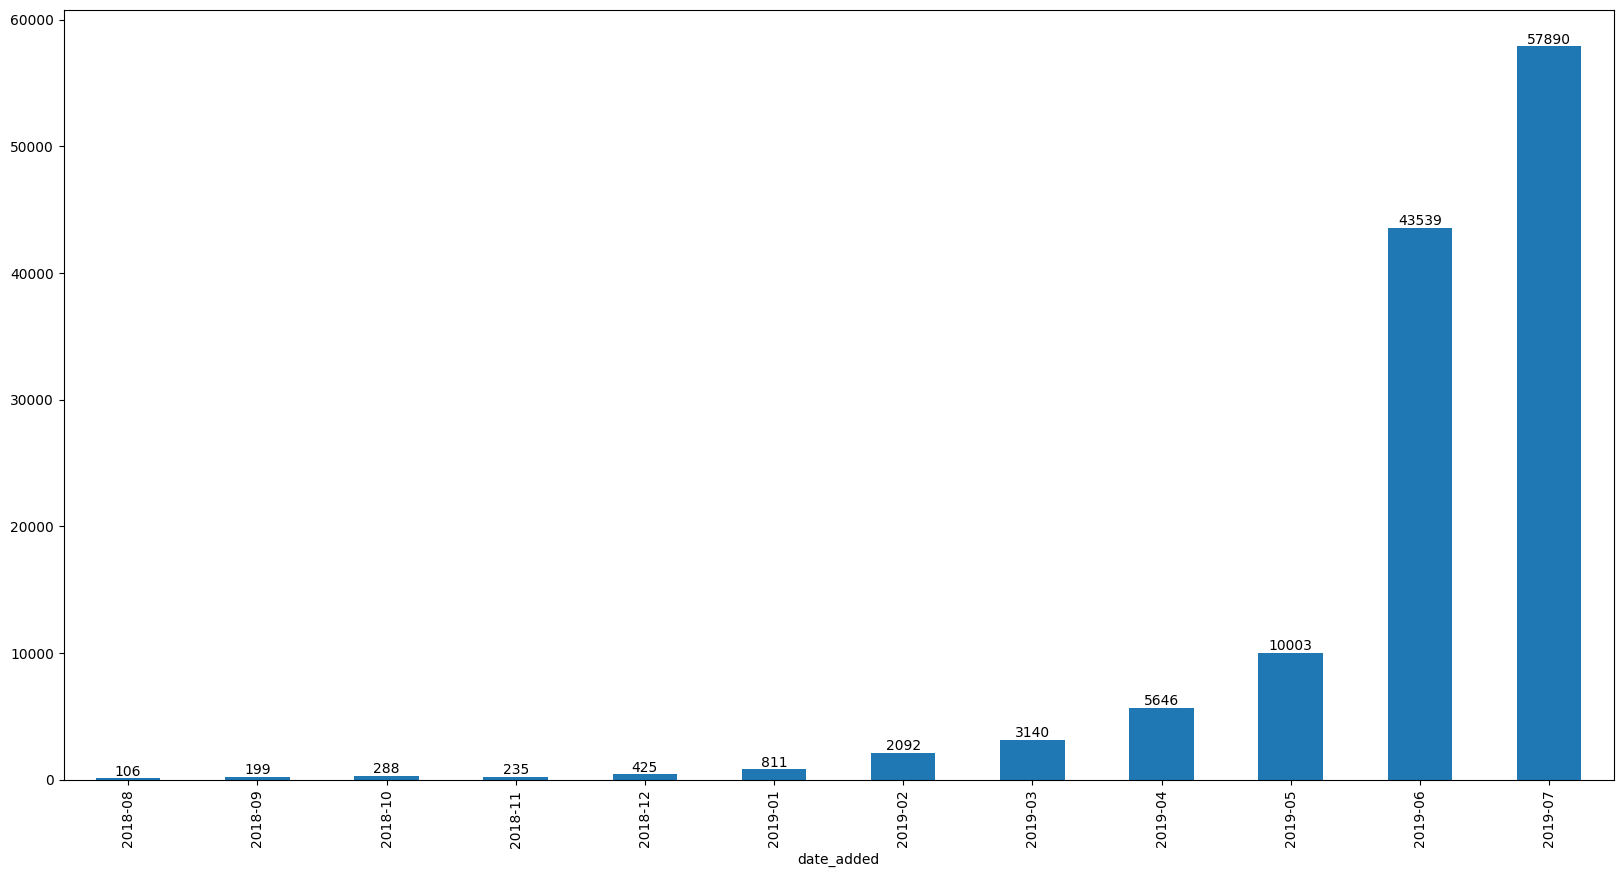

In [128]:
# Converting a column to date format
HP_df['date_added'] = pd.to_datetime(HP_df['date_added'])

#Visualize the results
count_month = HP_df.groupby(HP_df['date_added'].dt.to_period('M'))['date_added'].count()
ax = count_month.plot(kind = 'bar',figsize = (20,10))
for i,v in enumerate(count_month):
  ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

The graph shows that most of the ads were posted in June and July 2019. Least ads in August 2018.

Find the percentage of rent/sale by city

<Axes: ylabel='city'>

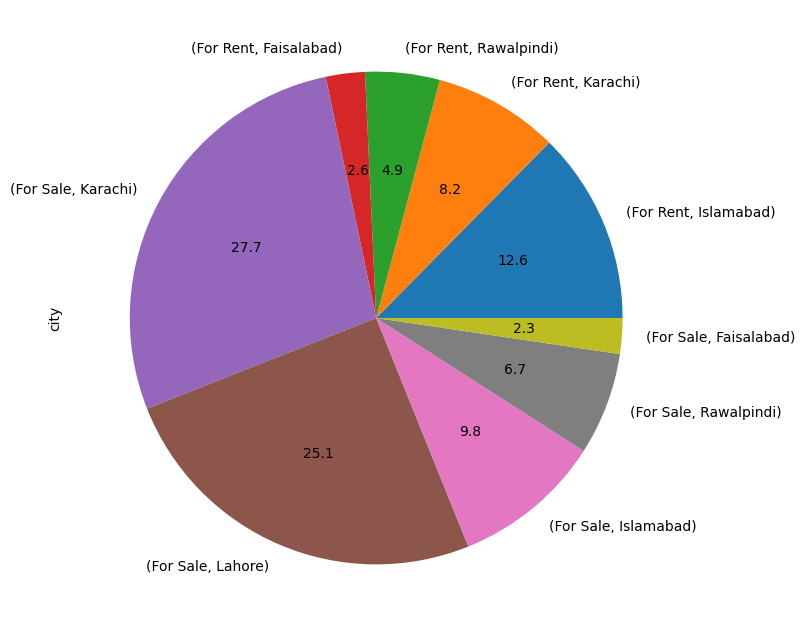

In [129]:
puprose_ads = HP_df.groupby('purpose')['city'].value_counts()
puprose_ads.plot(kind = 'pie',figsize = (15,8),autopct='%.1f')

The figure shows that more than 70% of ads are published for the sake of sale. More than 50% of all ads published for the sake of sales are located in the cities of Karachi and Lahore.